# Credit Card Exercise

- Use the K-Means Clustering algorithm to explore patterns in the dataset. 

- Choose a few features (2~4) of the dataset to compare (for example, what do the clustering patterns of credit limit vs balance look like?, etc.) 

- feel free to try out different numbers of clusters. 

- Try to discover what makes each cluster distinct from another (clusters of low balance vs high balance? Are there groups of certain credit limits?, etc.). 

- Use visualization if needed to identify trends in this data.

In [1]:
from sklearn.cluster import KMeans

import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
filepath = "CC GENERAL.csv"

df = pd.read_csv(filepath)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
len(df)

8950

### Cleaning up the data

In [7]:
df.isnull().sum() #CreditLimit Has a Null! 

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
df.dropna(subset=["CREDIT_LIMIT"], inplace = True)

In [9]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## K Means

In [10]:
X = df[['CREDIT_LIMIT', 'PAYMENTS', 'BALANCE']]
X.head()

,CREDIT_LIMIT,PAYMENTS,BALANCE
0,1000.0,201.802084,40.900749
1,7000.0,4103.032597,3202.467416
2,7500.0,622.066742,2495.148862
3,7500.0,0.000000,1666.670542
4,1200.0,678.334763,817.714335


In [11]:
kmeans = KMeans(n_clusters=5)

In [12]:
kmeans.fit(X)

KMeans(n_clusters=5)

In [14]:
kmeans.cluster_centers_

array([[ 6835.60747136,  7198.01160936,  2508.36676642],
       [ 2132.07614447,   891.00417161,   783.17868461],
       [13726.19047619, 22351.60354702,  5213.7396144 ],
       [12522.64833575,  2701.67921162,  5385.85397715],
       [ 6633.4924112 ,  1363.16523427,  1865.07348387]])

In [15]:
df['cluster'] = kmeans.labels_
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,4
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


### Cluster Analysis

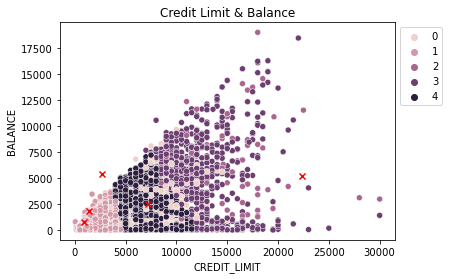

In [16]:
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='BALANCE', hue='cluster')

# scatterplot of centroid coordinates for income and spending score
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='x')

plt.title("Credit Limit & Balance")
#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

In [17]:
cluster = df.loc[df['cluster'] == 0]
cluster.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
23,C10024,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,0
34,C10035,3517.101616,0.727273,547.28,0.00,547.28,0.000000,1.000000,0.000000,1.000000,0.000000,0,14,11000.0,8735.607835,17862.558310,0.000000,12,0
57,C10059,2386.330629,1.000000,5217.62,4789.09,428.53,0.000000,0.916667,0.916667,0.500000,0.000000,0,42,7500.0,5678.729613,1311.514878,0.083333,12,0
68,C10071,3990.523579,1.000000,263.50,190.60,72.90,0.000000,0.666667,0.083333,0.583333,0.000000,0,8,6000.0,6876.836205,1001.607366,0.083333,12,0
84,C10088,1935.362486,1.000000,4915.60,4515.34,400.26,293.844792,1.000000,1.000000,0.333333,0.083333,1,50,9000.0,4921.066897,594.756686,0.000000,12,0


In [18]:
len(cluster)

538

In [19]:
cluster.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,534.000000,538.000000,538.000000,538.0
mean,2514.125895,0.910765,2878.817175,1950.521394,929.475558,2966.322669,0.563739,0.366280,0.421102,0.239541,7.643123,35.617100,6849.853554,7207.168910,1299.383050,0.215537,11.836431,0.0
std,1920.070279,0.196278,3325.823656,2661.712565,1485.096887,3527.617582,0.425946,0.375038,0.434053,0.262302,12.317002,48.080688,2536.178709,2421.807762,2642.185092,0.317378,0.721583,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,3879.252512,5.045387,0.000000,6.000000,0.0
25%,849.939143,0.909091,62.670000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,5000.000000,5360.174720,289.444364,0.000000,12.000000,0.0
50%,2225.242393,1.000000,1452.560000,590.050000,205.825000,1826.821052,0.750000,0.250000,0.250000,0.166667,3.000000,15.000000,7000.000000,6507.865152,720.970675,0.083333,12.000000,0.0
75%,3673.971867,1.000000,4937.880000,3272.120000,1261.110000,4904.355116,1.000000,0.666667,0.979167,0.416667,10.000000,52.000000,8988.636364,8474.588211,1309.985421,0.250000,12.000000,0.0
max,9699.252383,1.000000,15704.040000,12618.860000,8391.550000,17661.494860,1.000000,1.000000,1.000000,1.090909,123.000000,274.000000,15000.000000,17301.832380,42629.551170,1.000000,12.000000,0.0


In [21]:
sorted_clusters = sorted(df['cluster'].unique())

# select the rows of the same cluster number
# then get min/max income and average spending score
print("Cluster Income Ranges\n")
for cluster_num in sorted_clusters:
    small_df = df.loc[df['cluster'] == cluster_num]
    min_creditlimit = small_df['CREDIT_LIMIT'].min()
    max_creditlimit = small_df['CREDIT_LIMIT'].max()
    avg_balance = small_df['BALANCE'].mean()
    
    print(f"Cluster {cluster_num}: ${min_creditlimit}-{max_creditlimit}K, avg balance: {int(avg_balance)}")

Cluster Income Ranges

Cluster 0: $1000.0-15000.0K, avg balance: 2514
Cluster 1: $50.0-4800.0K, avg balance: 783
Cluster 2: $2500.0-30000.0K, avg balance: 5213
Cluster 3: $7000.0-30000.0K, avg balance: 5400
Cluster 4: $4000.0-12000.0K, avg balance: 1863
